In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import sys
import numpy as np

n = 20

def fun(x, y):
    return np.cos(3 * x) + np.sin(4 * y)

def xli(l, i):
    return i * (2 ** (-l))

def add_a(e):
    e['a'] = 0
    for i in range(9):
        di_0 = (i % 3) - 1
        di_1 = int(i / 3) - 1
        if (e['l'][0] != 0 or di_0 == 0) and (e['l'][1] != 0 or di_1 == 0):
            e['a'] += (-0.5) ** (abs(di_0) + abs(di_1)) * fun(xli(e['l'][0], e['i'][0] + di_0), xli(e['l'][1], e['i'][1] + di_1))
    return e

def phi(x):
    if -1 <= x <= 1:
        return 1 - abs(x)
    return 0

def phi_li(l, i, x):
    return phi(x * 2 ** l - i)

def eval(x, y):
    r = 0
    for e in grid:
        r += e['a'] * phi_li(e['l'][0], e['i'][0], x) * phi_li(e['l'][1], e['i'][1], y)
    return r

def generateGrid():
    return [add_a({'l': [1, 1], 'i': [1, 1]}),
            add_a({'l': [0, 0], 'i': [0, 0]}),
            add_a({'l': [0, 0], 'i': [0, 1]}),
            add_a({'l': [0, 0], 'i': [1, 0]}),
            add_a({'l': [0, 0], 'i': [1, 1]}),
            add_a({'l': [0, 1], 'i': [0, 1]}),
            add_a({'l': [0, 1], 'i': [1, 1]}),
            add_a({'l': [1, 0], 'i': [1, 0]}),
            add_a({'l': [1, 0], 'i': [1, 1]})]

In [2]:
detalization = [i for i in range(3, 9)]

sparseGrid = {'x': [], 'y': [], 'f': [], 'isSparse': True}
sparseError = []

regularGrid = {'x': [], 'y': [], 'f': [], 'isSparse': False}
regularError = []

sparse = (sparseGrid, sparseError)
regular = (regularGrid, regularError)

for n in detalization:
    print(n)
    
    for points, error in zip([sparseGrid, regularGrid], [sparseError, regularError]):
        grid = generateGrid()
        
        for e in grid:
            if points['isSparse'] and abs(e['a']) < 1e-3 or sum(e['l']) == n + 1:
                continue

            childs = []
            if e['l'][0] != 0:
                childs.append(add_a({'l': [e['l'][0] + 1, e['l'][1]], 'i': [2 * e['i'][0] - 1, e['i'][1]]}))
                childs.append(add_a({'l': [e['l'][0] + 1, e['l'][1]], 'i': [2 * e['i'][0] + 1, e['i'][1]]}))
            if e['l'][1] != 0:
                childs.append(add_a({'l': [e['l'][0], e['l'][1] + 1], 'i': [e['i'][0], 2 * e['i'][1] - 1]}))
                childs.append(add_a({'l': [e['l'][0], e['l'][1] + 1], 'i': [e['i'][0], 2 * e['i'][1] + 1]}))
            for child in childs:
                if child not in grid:
                    grid.append(child)
        
        e = 0
        for i in range(101):
            for j in range(101):
                x = i * 0.01
                y = j * 0.01
                e = max(e, abs(eval(x, y) - fun(x, y)))
        
        error.append(e)
        
        points['x'].append([xli(e['l'][0], e['i'][0]) for e in grid])
        points['y'].append([xli(e['l'][1], e['i'][1]) for e in grid])
        points['f'].append([fun(xli(e['l'][0], e['i'][0]), xli(e['l'][1], e['i'][1])) for e in grid])

3
4
5
6
7
8


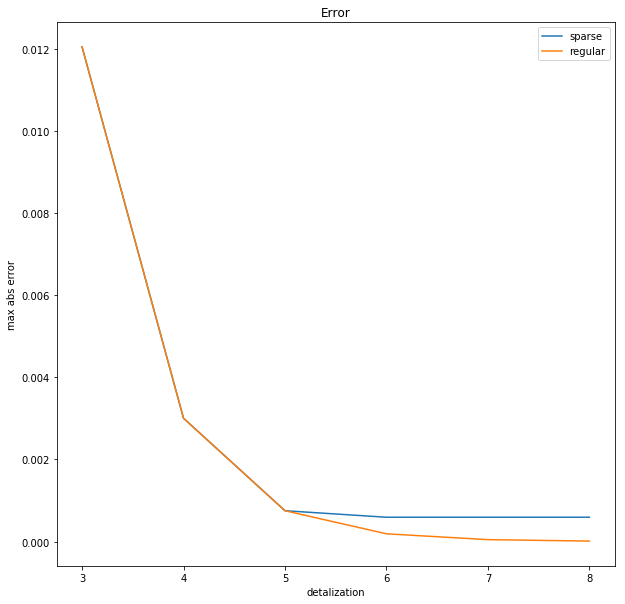

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_xlabel('detalization')
ax.set_ylabel('max abs error')

ax.set_title("Error")

ax.plot(detalization, sparseError, label='sparse')
ax.plot(detalization, regularError, label='regular')

ax.legend()


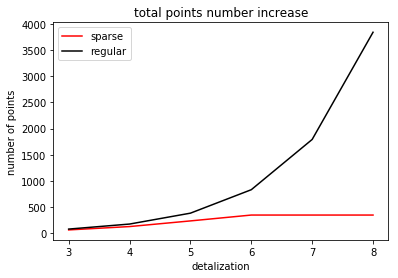

In [4]:
pointsNumber = {'sparse': [], 'regular': []}
for points, type in zip([regularGrid['x'], sparseGrid['x']], ['regular', 'sparse']):
    pointsNumber[type] = [len(points[i]) for i in range(len(points))]
    
fig, ax = plt.subplots()
    
ax.set_xlabel('detalization')
ax.set_ylabel('number of points')
ax.set_title("total points number increase")

ax.plot(detalization, pointsNumber['sparse'], label='sparse', color='red')
ax.plot(detalization, pointsNumber['regular'], label='regular', color='k')
ax.legend()

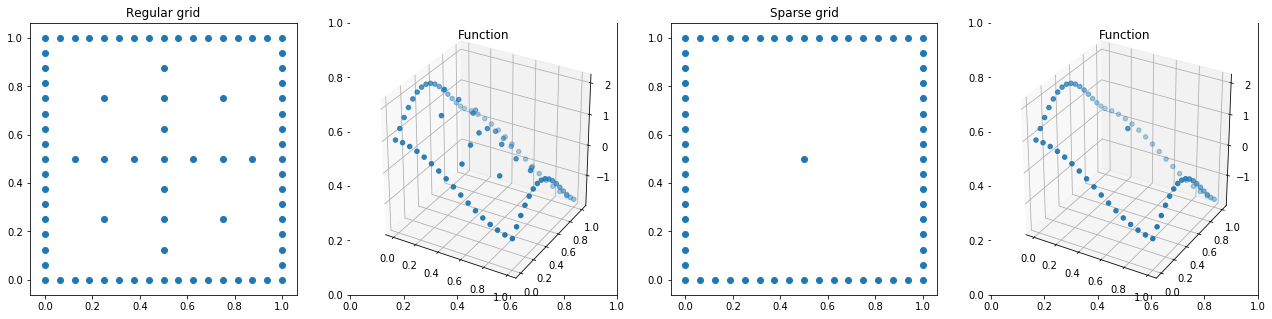

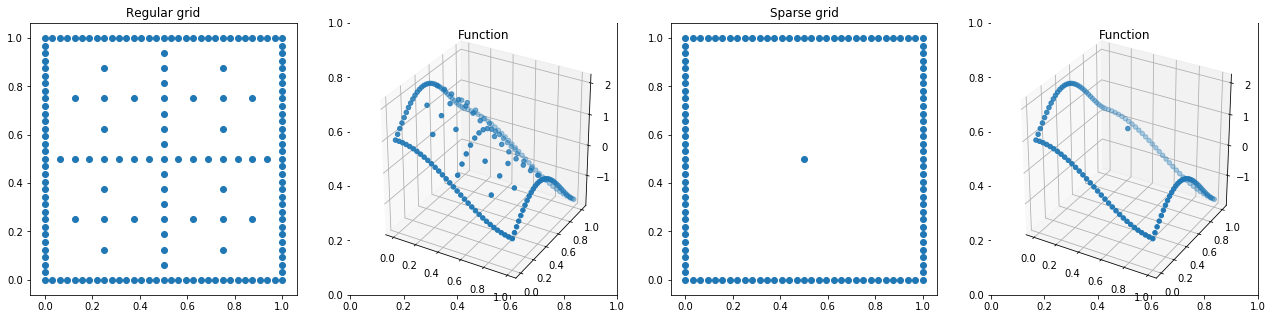

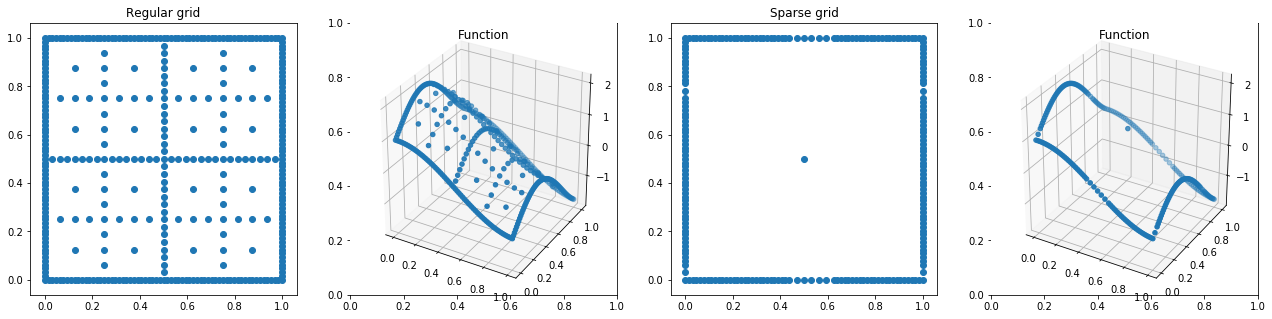

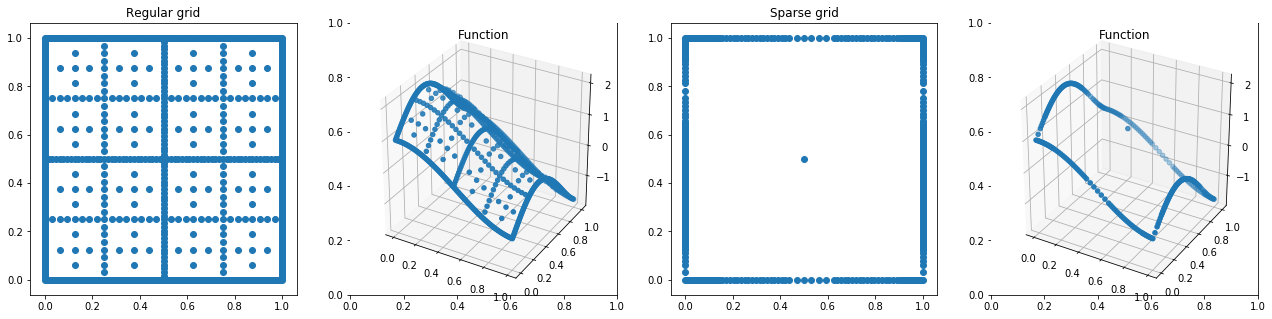

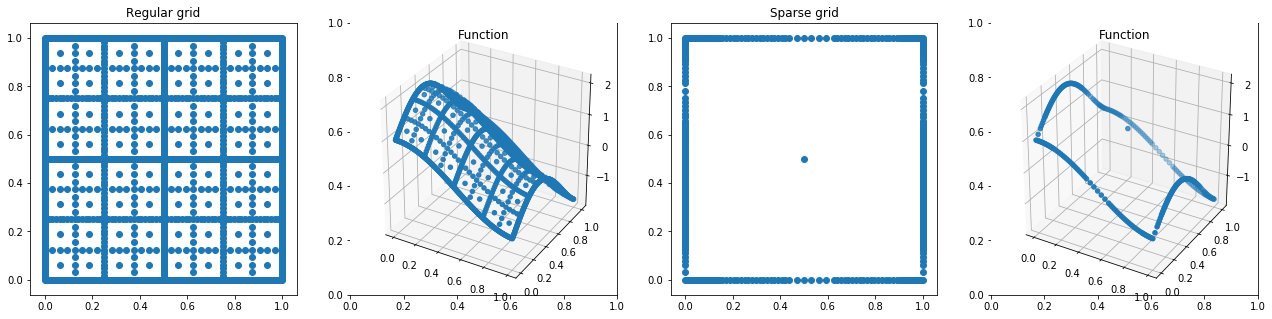

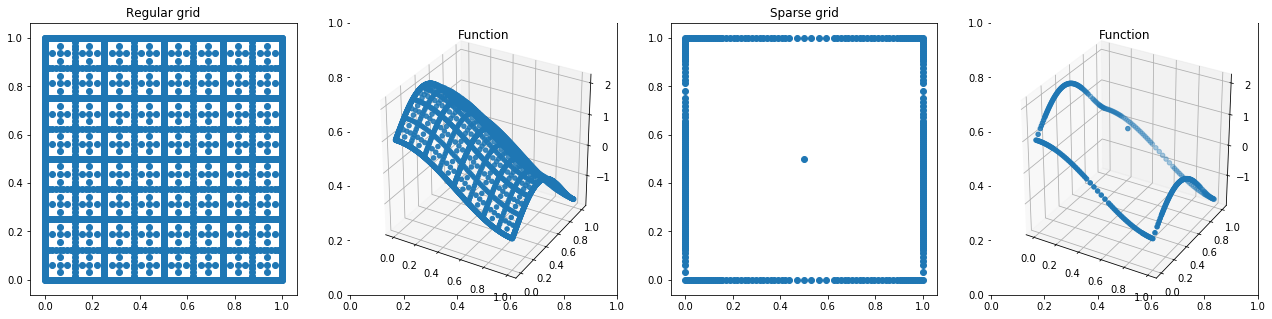

In [10]:
for i in range(len(detalization)):
    fig, ax = plt.subplots(1, 4, figsize=(22, 5))
    for k, grid in enumerate((regularGrid, sparseGrid)):
        ax[2 * k].scatter(grid['x'][i], grid['y'][i])
        ax[2 * k + 1] = fig.add_subplot(1, 4, 2 * k + 2, projection='3d')
        ax[2 * k + 1].scatter(grid['x'][i], grid['y'][i], grid['f'][i])
        
        ax[2 * k].set_title("Sparse grid" if grid['isSparse'] else "Regular grid")
        ax[2 * k + 1].set_title("Function")